# Home Assignment 1

# <font color="red"> Course: Machine and Deep Learning 

## <font color="red"> Cluster and PCA implementation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

______________________________________________________________________________________________________
The data was used is placed here: https://insideairbnb.com/get-the-data/ with the name listings.csv.gz
______________________________________________________________________________________________________

In [7]:
listings = pd.read_csv("listings.csv")

## <font color="red"> Task 1: Extract the primary factors that increase Airbnb booking prices.

## <font color="red"> EDA

Getting the listings dataset from March, because it contains data up until the olympics was held in Paris (July 24th 2024)

In [8]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20241206031559,2024-12-07,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,t,1,1,0,0,0.05
1,5396,https://www.airbnb.com/rooms/5396,20241206031559,2024-12-09,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.85,4.96,4.59,7510402838018,f,1,1,0,0,2.26
2,7397,https://www.airbnb.com/rooms/7397,20241206031559,2024-12-08,city scrape,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,...,4.89,4.94,4.74,7510400829623,f,2,2,0,0,2.20
3,7964,https://www.airbnb.com/rooms/7964,20241206031559,2024-12-09,previous scrape,Sunny apartment with balcony,"We are renting our a spacious, sunny fully fur...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,22155,...,5.00,5.00,5.00,7510903576564,f,1,1,0,0,0.03
4,9359,https://www.airbnb.com/rooms/9359,20241206031559,2024-12-09,city scrape,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,NaN,https://a0.muscache.com/pictures/c2965945-061f...,28422,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,NaN


In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91031 entries, 0 to 91030
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            91031 non-null  int64  
 1   listing_url                                   91031 non-null  object 
 2   scrape_id                                     91031 non-null  int64  
 3   last_scraped                                  91031 non-null  object 
 4   source                                        91031 non-null  object 
 5   name                                          91031 non-null  object 
 6   description                                   87540 non-null  object 
 7   neighborhood_overview                         45896 non-null  object 
 8   picture_url                                   91030 non-null  object 
 9   host_id                                       91031 non-null 

<p>Before carrying out the covariance and correlation-based analysis we need to covert the categorical variables of interest to a numberic form by using scikit learn's onehot encoder.</p>

In [11]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoder(listings, col):
    encoder = OneHotEncoder()
    encoded = encoder.fit_transform(listings[[col]])
    return pd.DataFrame(encoded.toarray(), columns = encoder.get_feature_names_out([col]))

df = one_hot_encoder(listings, 'room_type')
df

df2 = one_hot_encoder(listings, 'neighbourhood_cleansed')
df2 

listings = pd.concat([listings, df], axis=1).drop(columns=['room_type'])
listings = pd.concat([listings, df2], axis=1).drop(columns=['neighbourhood_cleansed'])

In [13]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91031 entries, 0 to 91030
Data columns (total 97 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            91031 non-null  int64  
 1   listing_url                                   91031 non-null  object 
 2   scrape_id                                     91031 non-null  int64  
 3   last_scraped                                  91031 non-null  object 
 4   source                                        91031 non-null  object 
 5   name                                          91031 non-null  object 
 6   description                                   87540 non-null  object 
 7   neighborhood_overview                         45896 non-null  object 
 8   picture_url                                   91030 non-null  object 
 9   host_id                                       91031 non-null 

<p><i>Double check one of the encoded columns to see if the encoding was successful:</i></p>


In [13]:
listings['neighbourhood_cleansed_Temple']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
91026    0.0
91027    0.0
91028    0.0
91029    0.0
91030    0.0
Name: neighbourhood_cleansed_Temple, Length: 91031, dtype: float64

<p><i> Change the price datatype to float. After this all columns that doesn't have a numeric datatype is removed in order to carry out the correlation analysis on the whole dataset: </p>

In [15]:
print(f" number of cols before dropping {len(listings.columns)}")
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)
listings = listings[listings.select_dtypes(include=['number']).columns]
print(f" number of cols after dropping {len(listings.columns)}")

 number of cols before dropping 97
 number of cols after dropping 65


In [ ]:
listings.info()

<p><i>Before getting to the correlation analysis we want to remove outliers in the price variable so they wont influence the correlations. Defining a function that removes outliers based on the inter quartile range</i></p>

In [17]:
def remove_outliers_IQR(column, df):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    rows=len(df)
    result = df[(column >= lower_bound) & (column <= upper_bound)]
    return result

<p><i>Plot the distribution of prices before and after removing the outliers:</i></p>


<Axes: xlabel='price'>

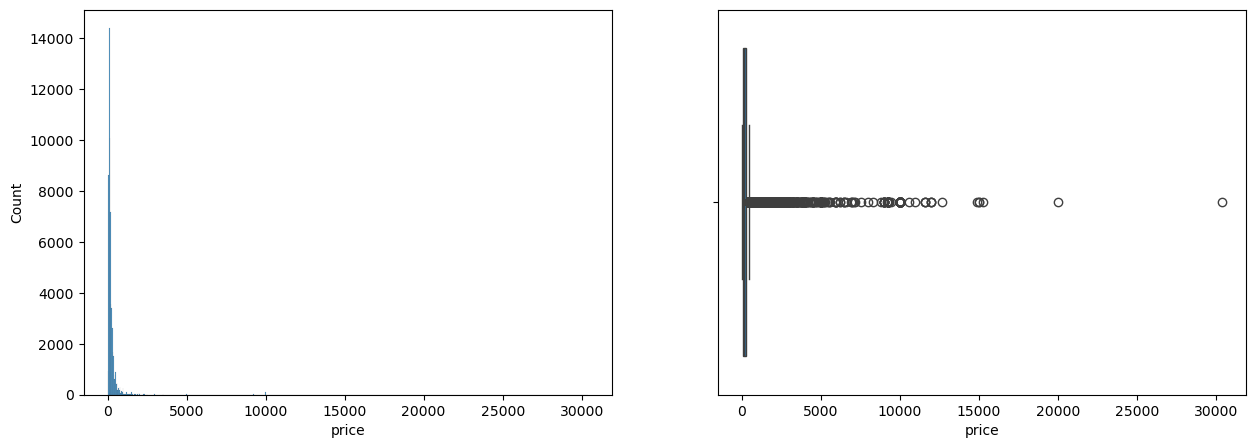

In [19]:
fig, axe = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=listings, x='price', binwidth=40, ax=axe[0])
sns.boxplot(data=listings, x='price', ax=axe[1])

In [21]:
listings = remove_outliers_IQR(listings['price'], listings)

<Axes: xlabel='price'>

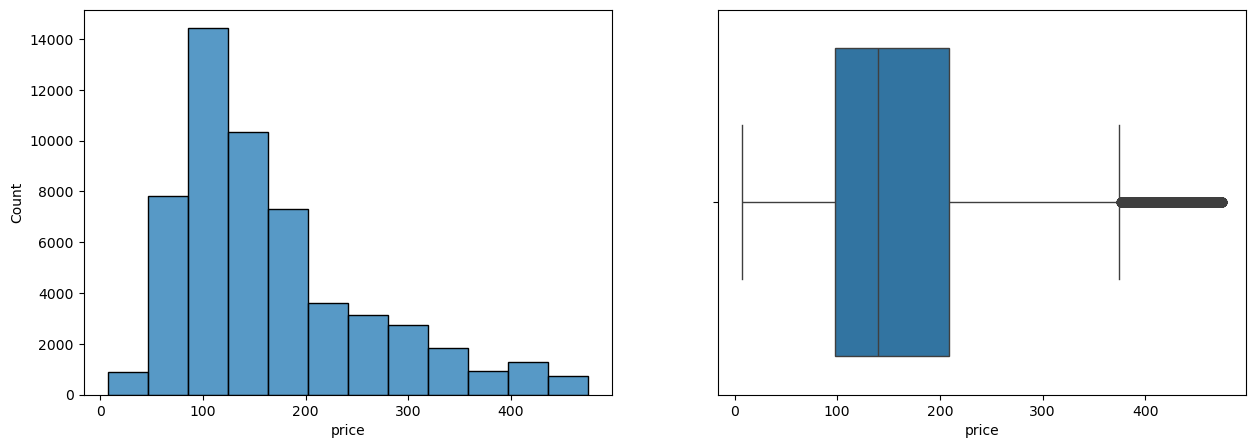

In [23]:
fig, axe = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=listings, x='price', binwidth=40, ax=axe[0])
sns.boxplot(data=listings, x='price', ax=axe[1])

<p><i>We also want to handle missing values before doing the calculations:</i></p>


In [27]:
(listings.isna().sum()/len(listings)).sort_values(ascending=False)

calendar_updated                  1.000000
neighbourhood_group_cleansed      1.000000
review_scores_checkin             0.223689
review_scores_value               0.223671
review_scores_location            0.223671
                                    ...   
number_of_reviews_ltm             0.000000
number_of_reviews_l30d            0.000000
scrape_id                         0.000000
calculated_host_listings_count    0.000000
neighbourhood_cleansed_Élysée     0.000000
Length: 65, dtype: float64

<p><i>These variables are removed due to their high number of missing values:</i></p>


In [25]:
listings.drop(['calendar_updated','neighbourhood_group_cleansed', 'id', 'scrape_id', 'host_id', 'longitude', 'latitude'], axis=1, inplace=True)

<p><i>For the remaining variables in the dataframe, we simply handle the missing values by imputing the median:</i></p>


In [27]:
listings = listings.fillna(listings.median()) 

(listings.isna().sum()/len(listings)).sort_values(ascending=False)

host_listings_count                             0.0
neighbourhood_cleansed_Gobelins                 0.0
calculated_host_listings_count_private_rooms    0.0
calculated_host_listings_count_shared_rooms     0.0
reviews_per_month                               0.0
room_type_Entire home/apt                       0.0
room_type_Hotel room                            0.0
room_type_Private room                          0.0
room_type_Shared room                           0.0
neighbourhood_cleansed_Batignolles-Monceau      0.0
neighbourhood_cleansed_Bourse                   0.0
neighbourhood_cleansed_Buttes-Chaumont          0.0
neighbourhood_cleansed_Buttes-Montmartre        0.0
neighbourhood_cleansed_Entrepôt                 0.0
neighbourhood_cleansed_Hôtel-de-Ville           0.0
host_total_listings_count                       0.0
neighbourhood_cleansed_Louvre                   0.0
neighbourhood_cleansed_Luxembourg               0.0
neighbourhood_cleansed_Ménilmontant             0.0
neighbourhoo

In [33]:
listings['price'].describe()

count    55148.000000
mean       166.175328
std         93.059668
min          7.000000
25%         98.000000
50%        140.000000
75%        209.000000
max        475.000000
Name: price, dtype: float64

## <font color='red'> Task 1.1: Write a Python code to perform covariance and correlation-based analysis to detect price variability (if any). Do not use any built-in covariance and correlation method. Write your own code for the calculation.

<h3> Caluclate Correlations

<p><i>Let's create self defined functions to calculate the components of correlations: mean, std deviation and covariance: </i></p>

In [36]:
def get_mean(col):
    total=0
    for number in col:
        total+=number
    if len(col)==0:
        return None
    return total/len(col)

In [40]:
def get_std(col):
    mean = get_mean(col)
    diff_sum=0
    for number in col:
        diff_sum+=(number-mean)**2
    variance = diff_sum/(len(col)-1)
    return np.sqrt(variance)

In [42]:
def cov(col1, col2): 
    mean1 = get_mean(col1)
    # print(f"mean: {mean1}")
    mean2 = get_mean(col2)
    # print(f"mean: {mean2}")

    diff_sum = 0 
    
    for n1, n2 in zip(col1, col2):
        diff1 = n1 - mean1
        diff2 = n2 - mean2
        diff_sum+=(diff1*diff2)
    cov = diff_sum/(len(col1)-1)
    return cov  

In [44]:
def correlate(col1, col2):
    covariance = cov(col1, col2)
    std1 = get_std(col1)
    std2 = get_std(col2)
    if std1 == 0 or std2 == 0:
        return None
    return covariance/(std1*std2)
    
correlate(listings['price'], listings['reviews_per_month'])  

-0.08713105513490466

<p><i>To perform the analyisis we create a function that for a given datafrime with a price columns calculates its correlation with all other features and then prints it in descending order</i></p>

In [46]:
def display_price_correlations(df):
    coef={}
    if 'price' not in df.columns:
        raise ValueError("The dataframe doesnt have a price column")
    for column in df.columns:
        coef[column]=correlate(df['price'], df[column])
    sorted_coef = dict(sorted(coef.items(), key=lambda item: (item[1] is None, abs(item[1] or 0)), reverse=True))

        
    for key, value in sorted_coef.items():
        if value!=None:
            print(f"price and {key}: {round(value, 3)} \n")
        else:
            print(f"price and {key}: {value} \n")

display_price_correlations(listings)    

price and price: 1.0 

price and accommodates: 0.505 

price and bedrooms: 0.478 

price and beds: 0.411 

price and bathrooms: 0.34 

price and review_scores_location: 0.127 

price and review_scores_cleanliness: 0.127 

price and number_of_reviews_l30d: -0.117 

price and minimum_nights_avg_ntm: -0.11 

price and room_type_Private room: -0.108 

price and minimum_nights: -0.108 

price and review_scores_rating: 0.108 

price and minimum_minimum_nights: -0.105 

price and availability_365: 0.101 

price and review_scores_value: 0.096 

price and availability_90: 0.095 

price and room_type_Entire home/apt: 0.091 

price and review_scores_accuracy: 0.087 

price and maximum_minimum_nights: -0.087 

price and reviews_per_month: -0.087 

price and availability_60: 0.087 

price and neighbourhood_cleansed_Ménilmontant: -0.086 

price and neighbourhood_cleansed_Élysée: 0.085 

price and number_of_reviews_ltm: -0.084 

price and neighbourhood_cleansed_Buttes-Montmartre: -0.082 

price and a

<p><i>We double check with the buldt in .corr() function to assess whether our calculations are correct:</i></p>

In [335]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
listings.corr()['price'].sort_values(ascending=False)

price                                           1.000000
accommodates                                    0.505233
bedrooms                                        0.477822
beds                                            0.411222
bathrooms                                       0.339723
review_scores_location                          0.126928
review_scores_cleanliness                       0.126918
review_scores_rating                            0.107560
availability_365                                0.101029
review_scores_value                             0.096303
availability_90                                 0.095205
room_type_Entire home/apt                       0.091401
review_scores_accuracy                          0.087455
availability_60                                 0.086785
neighbourhood_cleansed_Élysée                   0.085391
availability_30                                 0.081384
room_type_Hotel room                            0.080793
neighbourhood_cleansed_Louvre  

<p><i>Our main findings from this anaysis is that accommodates is the highest correlated feature with price. We also see that bedrooms, beds and bathrooms are other important factors. However, as these variables likely are highly correlated with accommodates, we want to keep out main focus on accomodates in the further analysis. Nevertheless we will also use these variables to assess if there could be any interesting differences.  </i></p>

## <font color='red'> Finidngs visualization.

<p><i>Before plotting our findings from the correlation analysis we want to control that the correlated variables doesn't contain any extreme values that could mess up our plots or cluster analysis:</i></p>

In [337]:
def plot_selected_cols(selected_cols, df, binwidth):
    fig, axe = plt.subplots(len(selected_cols),2, figsize=(15,10))
    counter=0
    
    for col in selected_cols:
        sns.histplot(data=df, x=col, kde=True, binwidth=binwidth, ax=axe[counter,0])
        sns.boxplot(data=df, x=col, ax=axe[counter,1])
        axe[counter, 0].set_title(f"Distribution of {col}")
        axe[counter, 1].set_title(f"Boxplot of {col}")
        plt.tight_layout()
        counter+=1
        
    plt.show()     

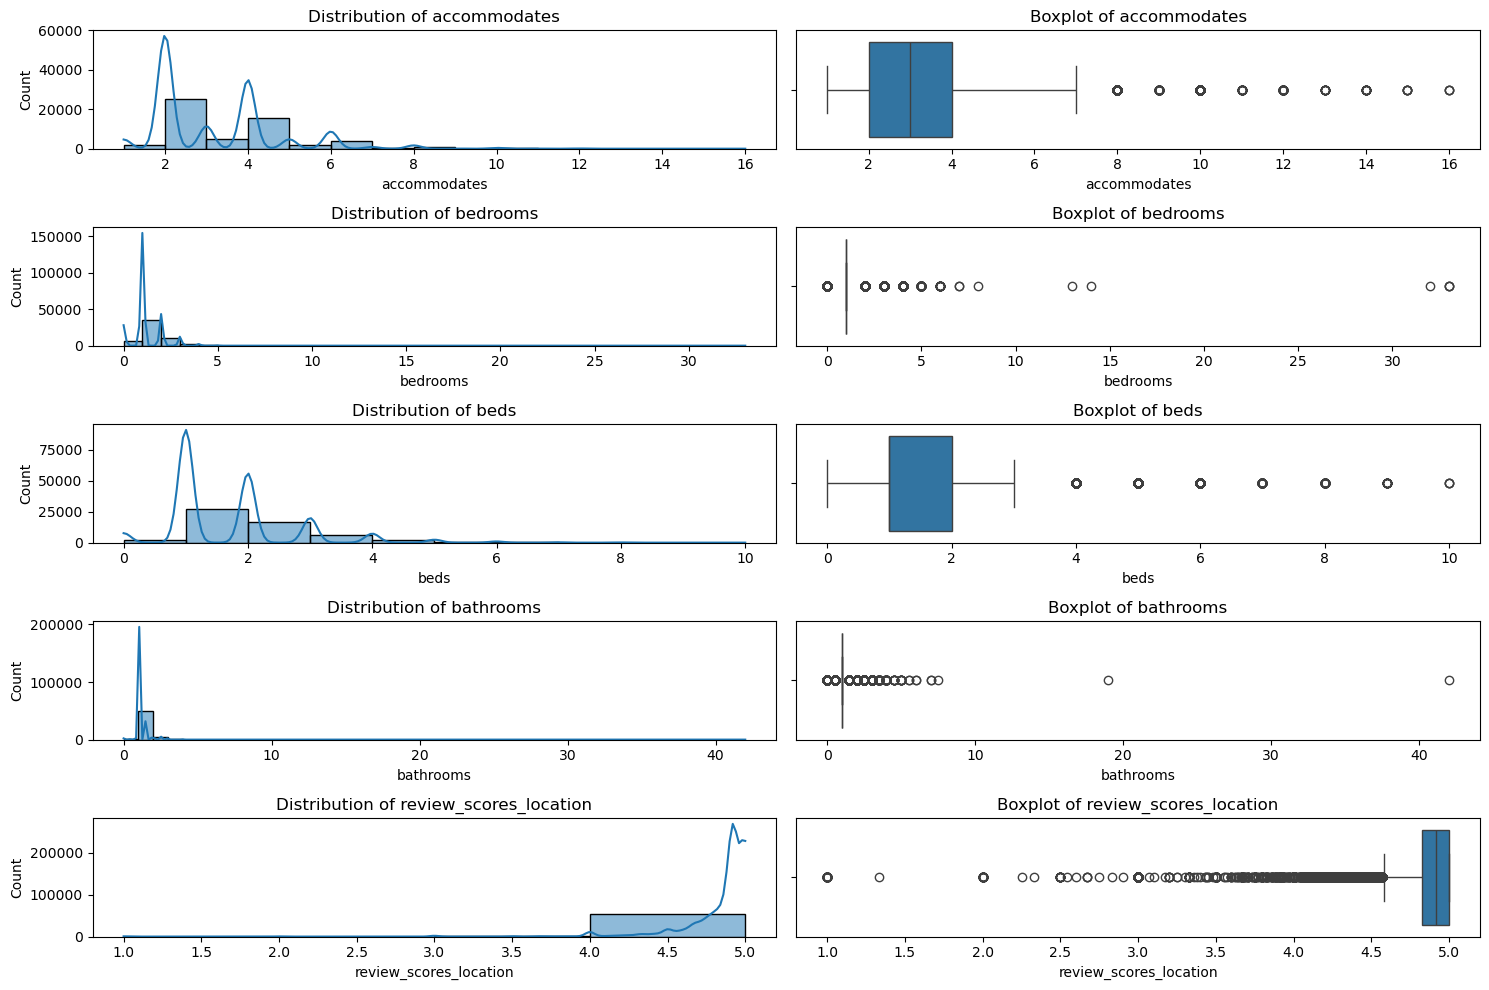

In [339]:
plot_selected_cols(['accommodates', 'bedrooms', 'beds', 'bathrooms', 'review_scores_location'],listings, 1)

<p><i>From this plot it looks like several of the features contains outliers with respect to the IQR method. However after assessing these values we cocnluded that the IQR method is to strinct in some instances, and that we only find it necessary to remove ouliers in the bedrooms and bathrooms features.</i></p>

In [84]:
listings.bedrooms.describe()

count    55148.000000
mean         1.205356
std          0.808447
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         33.000000
Name: bedrooms, dtype: float64

In [29]:
listings = listings[listings.bedrooms<=5]

listings = listings[listings.bathrooms<=4]

<p><i>As illustrated the distributions of the variables look more reasonable after adjusting bathrooms and beds:</i></p>

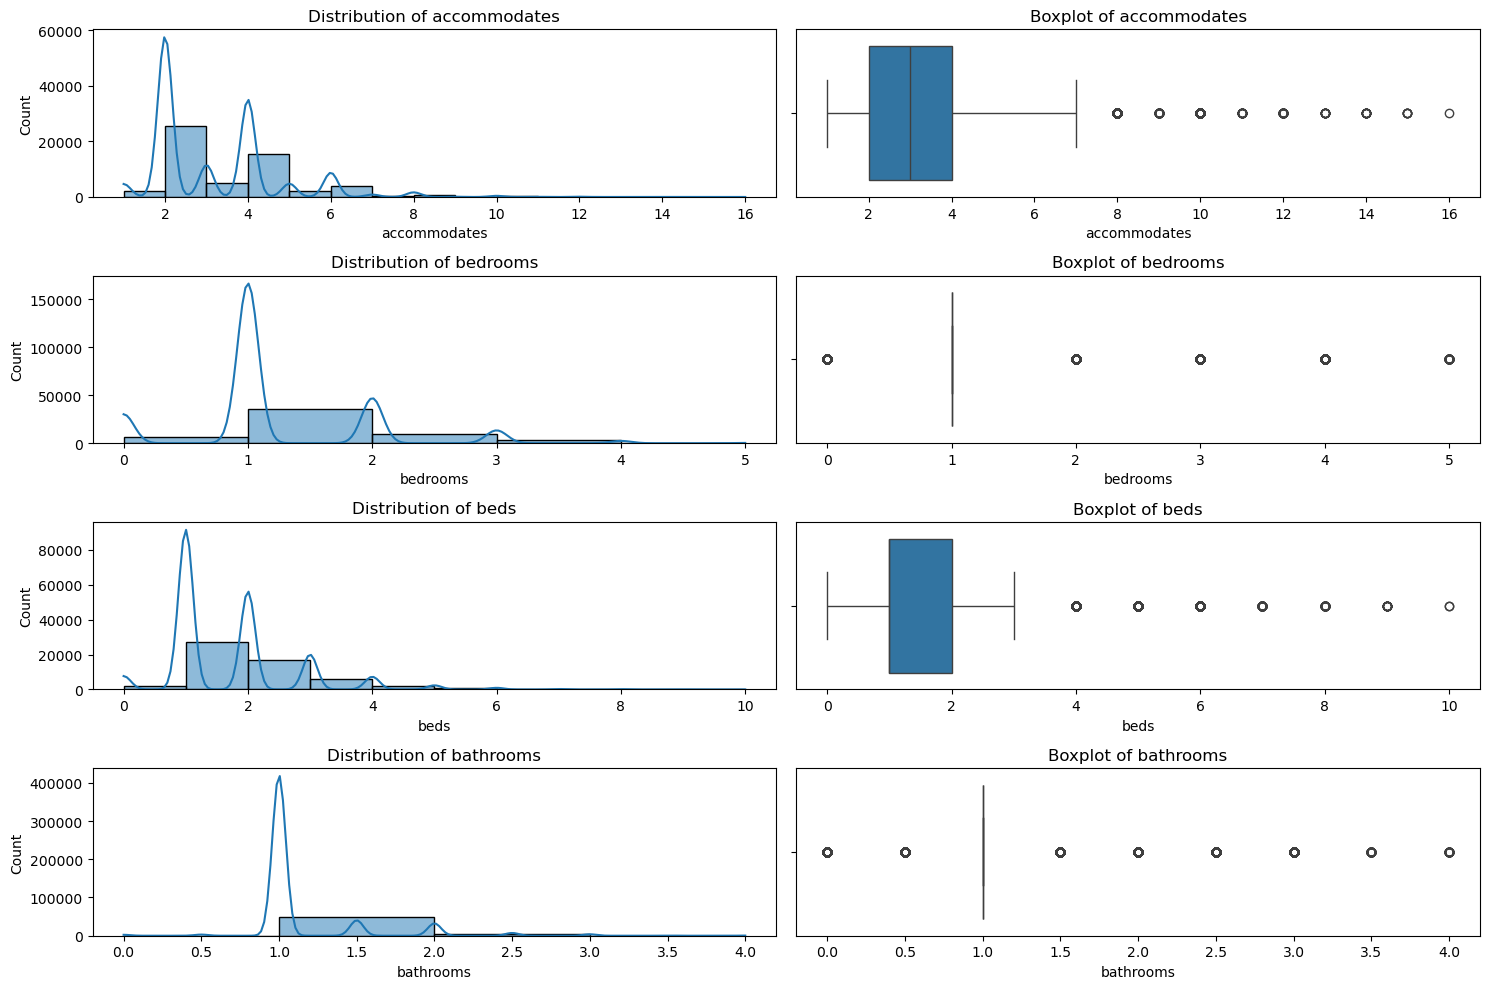

In [375]:
plot_selected_cols(['accommodates', 'bedrooms', 'beds', 'bathrooms'], listings, 1)


<p><i>What we also want now is to scale these featrures before plotting to avoid the datapoint being centered more accross mone axis due to scale differences. This is also important for our clustering algorithm to work properly:</i></p>

In [31]:
from sklearn.preprocessing import StandardScaler

def scale_feature(col, df):
    scaler = StandardScaler()
    df[f"{col}_scaled"]=scaler.fit_transform(df[[col]])
    print(df[f"{col}_scaled"].describe())

In [33]:
features = ['price', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'review_scores_location']
for feature in features:
    scale_feature(feature, listings)

count    5.510100e+04
mean     1.403006e-16
std      1.000009e+00
min     -1.711713e+00
25%     -7.326430e-01
50%     -2.807646e-01
75%      4.616070e-01
max      3.323503e+00
Name: price_scaled, dtype: float64
count    5.510100e+04
mean    -1.072887e-16
std      1.000009e+00
min     -1.394072e+00
25%     -7.502686e-01
50%     -1.064652e-01
75%      5.373383e-01
max      8.262979e+00
Name: accommodates_scaled, dtype: float64
count    5.510100e+04
mean    -6.189734e-18
std      1.000009e+00
min     -1.596684e+00
25%     -2.661703e-01
50%     -2.661703e-01
75%     -2.661703e-01
max      5.055883e+00
Name: bedrooms_scaled, dtype: float64
count    5.510100e+04
mean    -4.074908e-17
std      1.000009e+00
min     -1.608030e+00
25%     -6.535329e-01
50%     -6.535329e-01
75%      3.009643e-01
max      7.936942e+00
Name: beds_scaled, dtype: float64
count    5.510100e+04
mean     1.201840e-16
std      1.000009e+00
min     -2.972788e+00
25%     -3.567023e-01
50%     -3.567023e-01
75%     -3.5670

<p><i>Now we are ready to plot our findings from last task. Due to the removed outliers we see that the order of the correlations has changed slitly:</i></p>

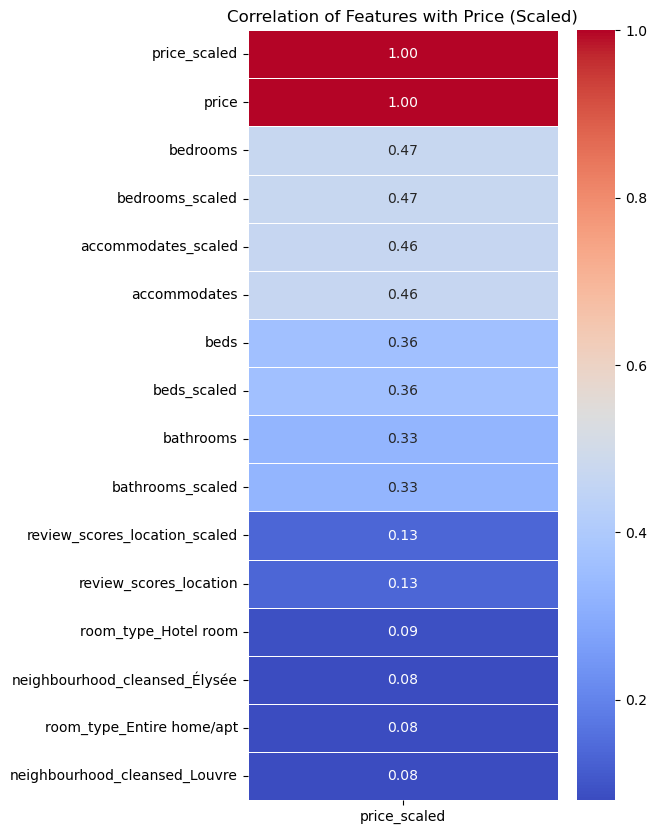

In [126]:
plt.figure(figsize=(5, 10))  

sorted_corr = listings.corr().sort_values(by='price_scaled', ascending=False)

sns.heatmap(sorted_corr[['price_scaled']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation of Features with Price (Scaled)")
plt.show()

<p><i>Next we plot a pair plot to look after any interesting shapes in relationship between the features and price. As you see, there is a lot of datapoints and difficult to extract any obvoius patters/clusters: </i></p>

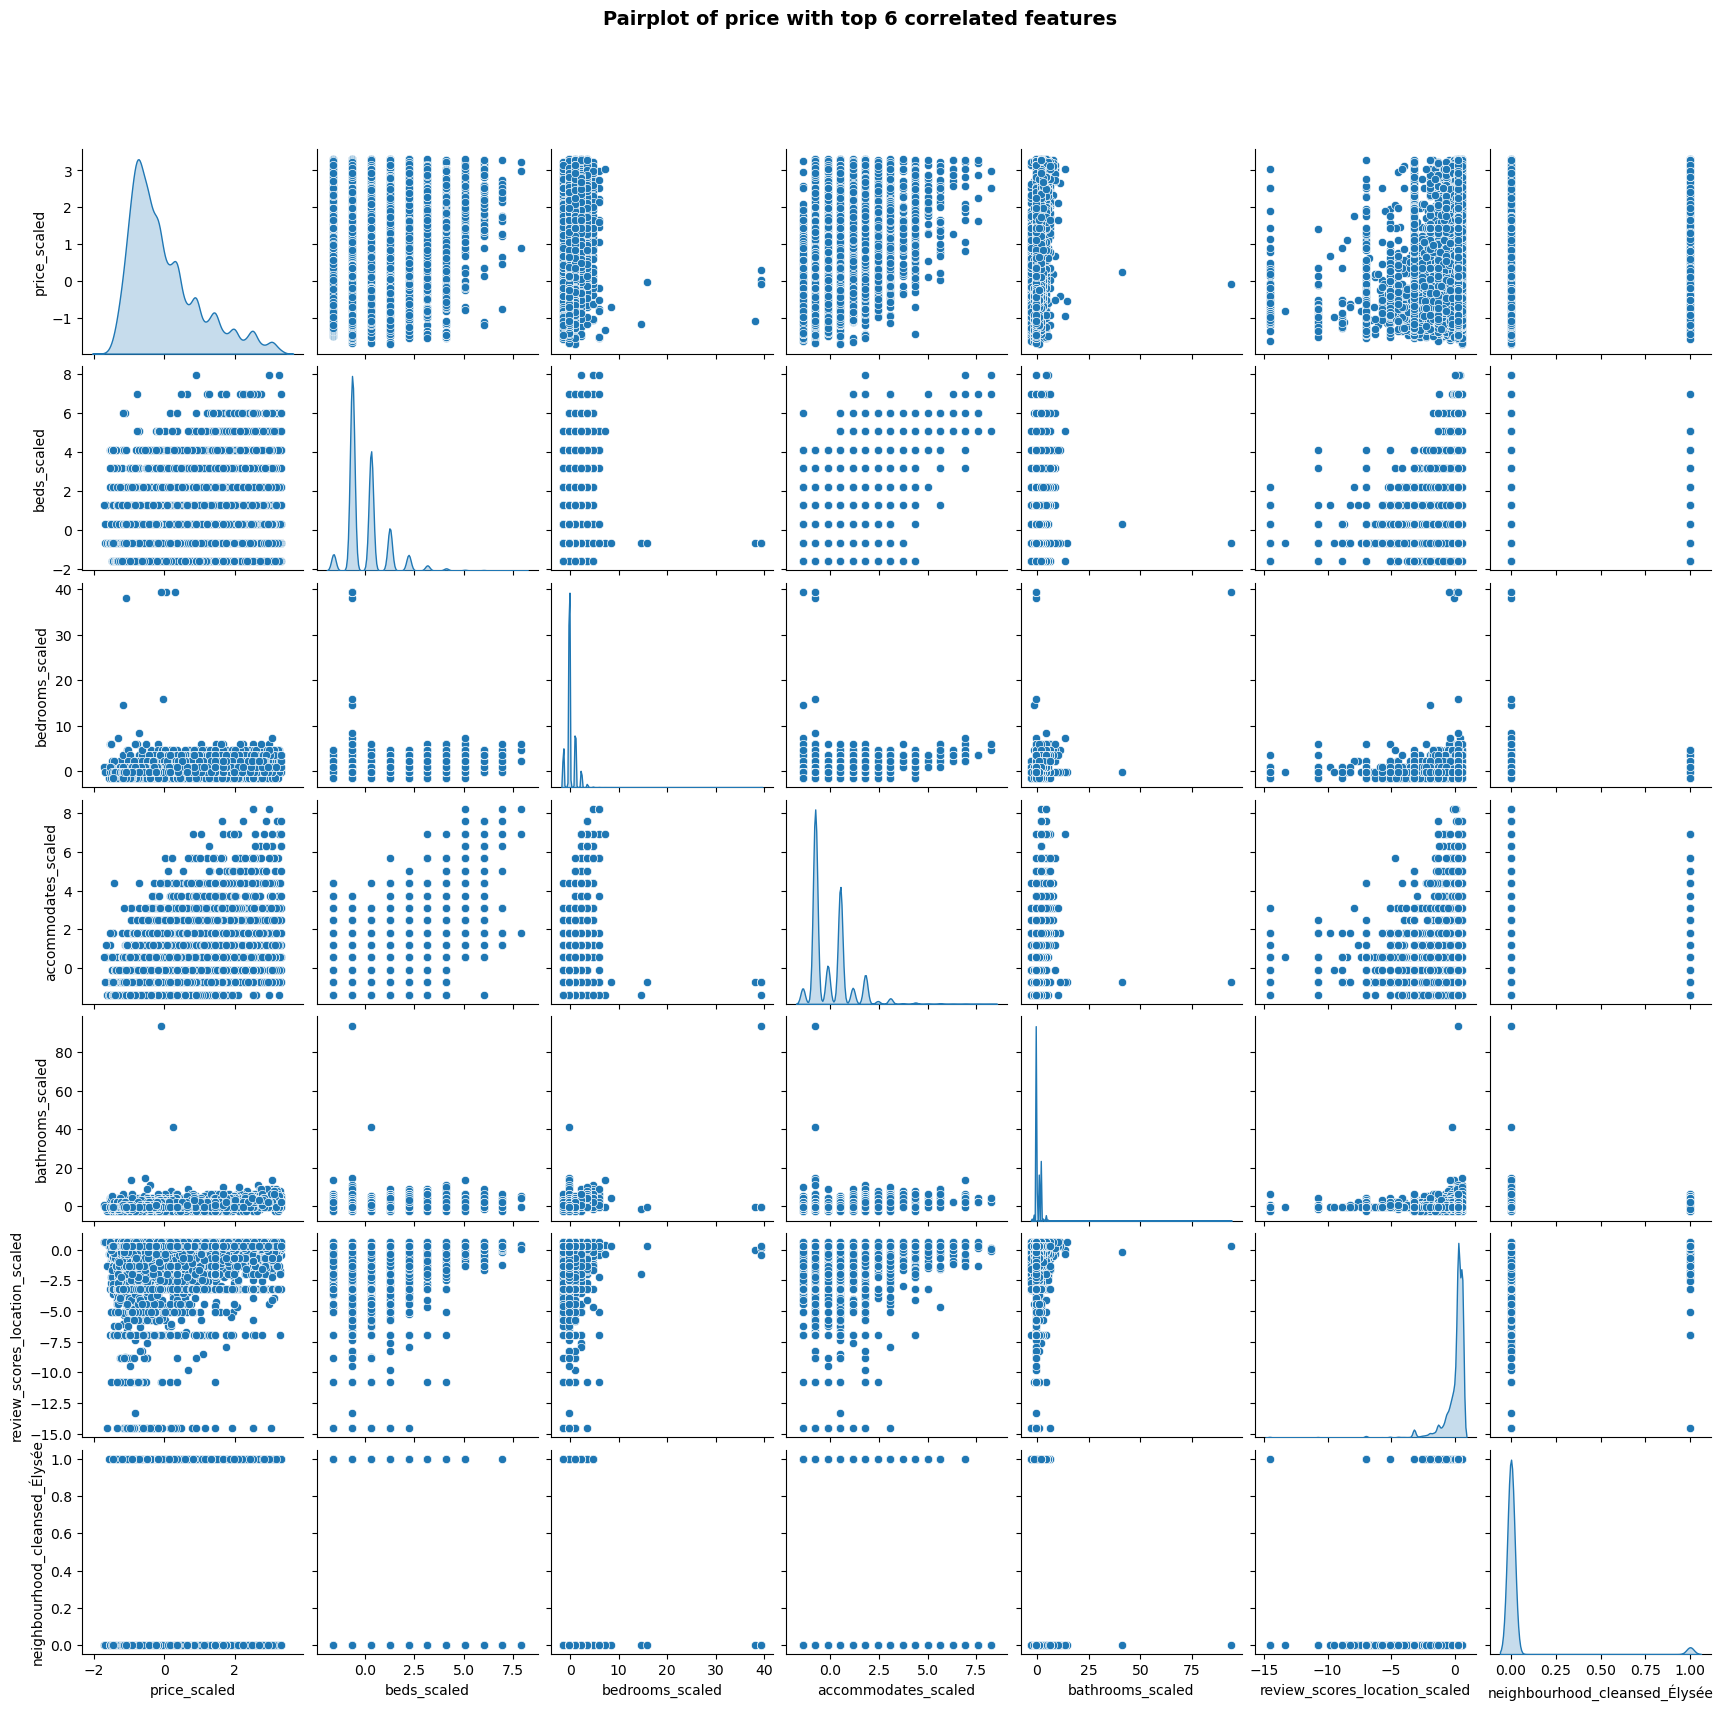

In [345]:
sns.pairplot(listings[['price_scaled', 'beds_scaled', 'bedrooms_scaled', 'accommodates_scaled', 'bathrooms_scaled','review_scores_location_scaled', 'neighbourhood_cleansed_Élysée']], diag_kind="kde")
plt.subplots_adjust(top=0.9)
plt.suptitle("Pairplot of price with top 6 correlated features", fontsize=14, fontweight='bold')

plt.show()

<p><i>To get a more narrow view, we use a scatter plot of the to correlating factors and price:</i></p>

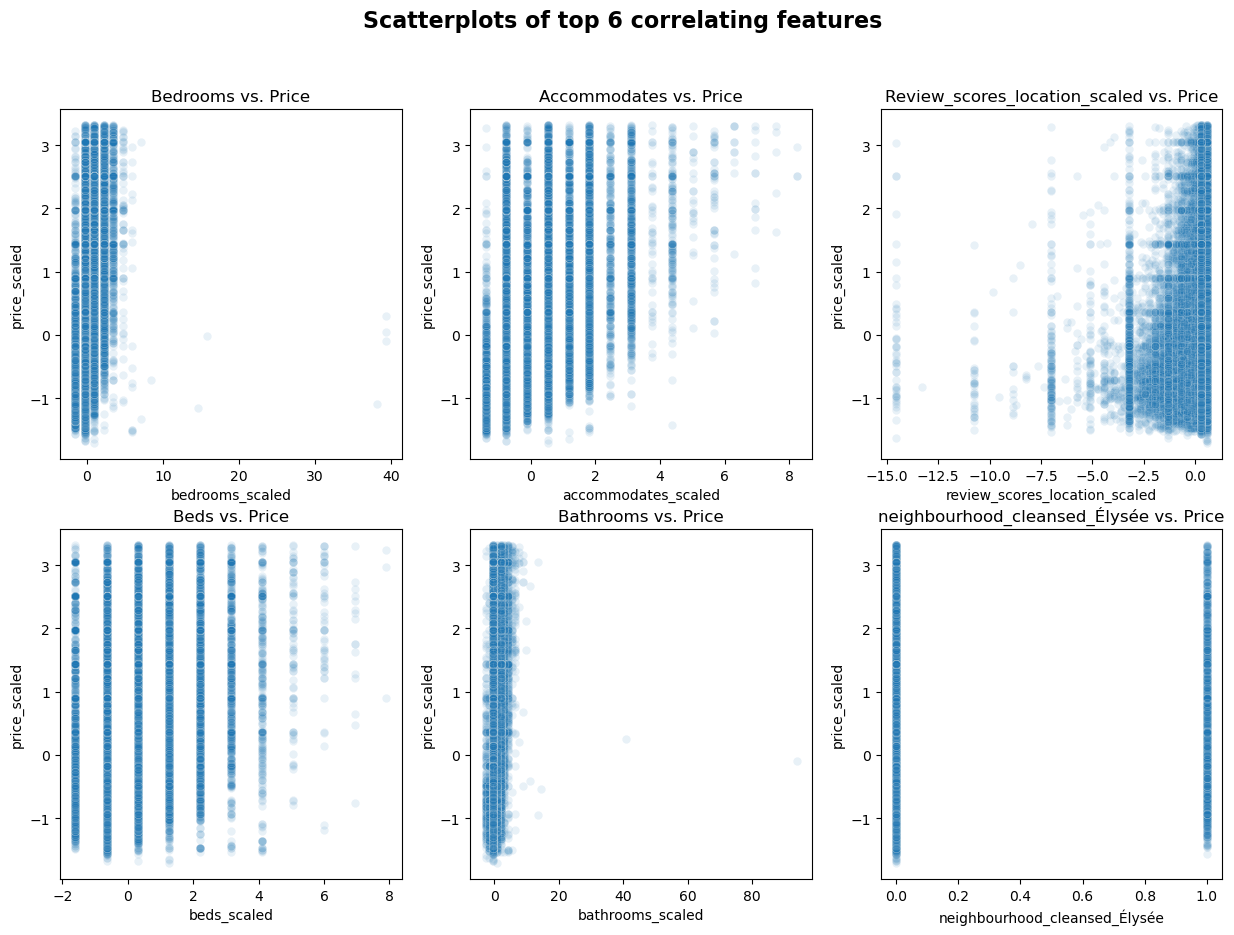

In [347]:
fig, axe = plt.subplots(2,3, figsize=(15,10))
sns.scatterplot(data=listings, x='bedrooms_scaled', y='price_scaled', alpha=0.1,  ax=axe[0,0])
sns.scatterplot(data=listings, x='accommodates_scaled', y='price_scaled',alpha=0.1, ax=axe[0,1])
sns.scatterplot(data=listings, x='review_scores_location_scaled', y='price_scaled',alpha=0.1, ax=axe[0,2])
sns.scatterplot(data=listings, x='beds_scaled', y='price_scaled', alpha=0.1,  ax=axe[1,0])
sns.scatterplot(data=listings, x='bathrooms_scaled', y='price_scaled',alpha=0.1, ax=axe[1,1])
sns.scatterplot(data=listings, x='neighbourhood_cleansed_Élysée', y='price_scaled',alpha=0.1, ax=axe[1,2])

# axe[0,0].set_xlim(0, 8)
# axe[1,1].set_xlim(0, 15)

axe[0,0].set_title("Bedrooms vs. Price")
axe[0,1].set_title("Accommodates vs. Price")
axe[0,2].set_title("Review_scores_location_scaled vs. Price")
axe[1,0].set_title("Beds vs. Price")
axe[1,1].set_title("Bathrooms vs. Price")
axe[1,2].set_title("neighbourhood_cleansed_Élysée vs. Price")

fig.suptitle("Scatterplots of top 6 correlating features", fontsize=16, fontweight='bold')
plt.show()

<p><i>We add a regression line to the plots to capture the direction of the relationships:</i></p>

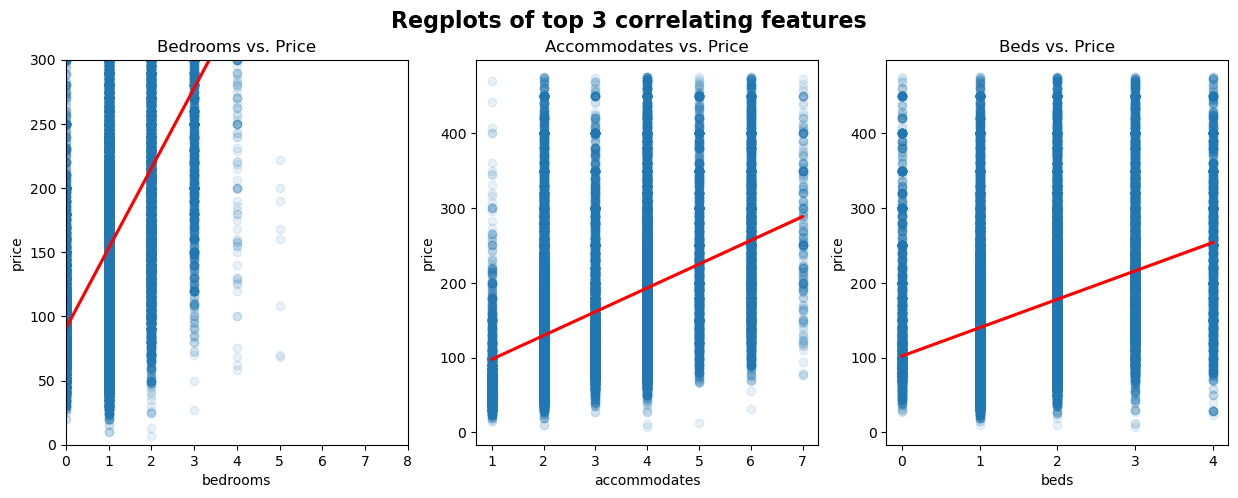

In [154]:
fig, axe = plt.subplots(1,3, figsize=(15,5))
sns.regplot(data=listings, x='bedrooms', y='price', scatter_kws={'alpha': 0.1}, line_kws={'color': 'red'}, ax=axe[0])  
sns.regplot(data=listings, x='accommodates', y='price', scatter_kws={'alpha': 0.1}, line_kws={'color': 'red'}, ax=axe[1])  
sns.regplot(data=listings, x='beds', y='price', scatter_kws={'alpha': 0.1}, line_kws={'color': 'red'}, ax=axe[2])  

axe[0].set_title("Bedrooms vs. Price")
axe[1].set_title("Accommodates vs. Price")
axe[2].set_title("Beds vs. Price")

axe[0].set_xlim(0, 8)
axe[0].set_ylim(0, 300)

fig.suptitle("Regplots of top 3 correlating features", fontsize=16, fontweight='bold')
plt.show()

<p><i>Additionaly we illustrate the relationshipts with boxplots using bins on the numeric variables. These show the same trend. However, boxplots may not be the most suitable approach to this objective:</i></p>

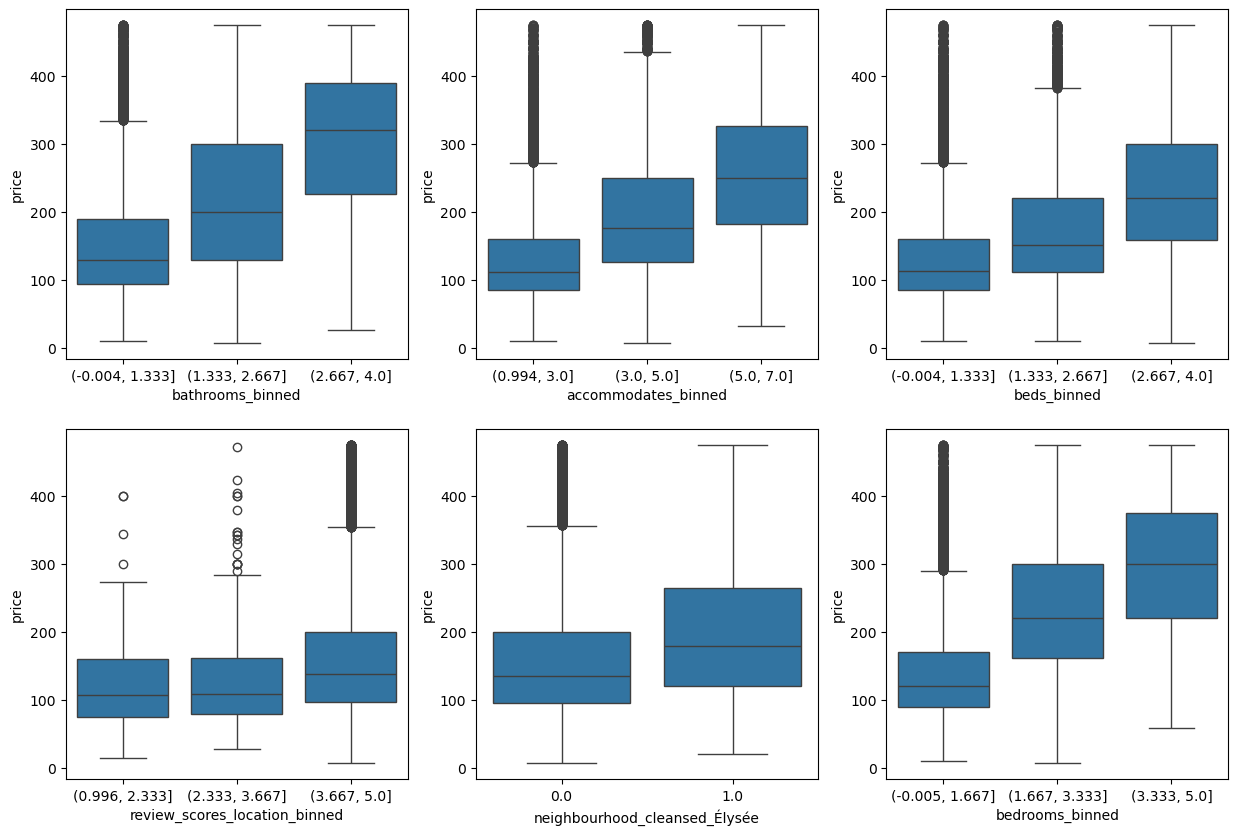

In [162]:
data = listings.copy()
data['bathrooms_binned']=pd.cut(listings['bathrooms'], bins=3)
data['accommodates_binned']=pd.cut(listings['accommodates'], bins=3)
data['beds_binned']=pd.cut(listings['beds'], bins=3)
data['review_scores_location_binned']=pd.cut(listings['review_scores_location'], bins=3)
data['bedrooms_binned']=pd.cut(listings['bedrooms'], bins=3)

fig, axe = plt.subplots(2,3, figsize=(15,10))
sns.boxplot(data=data, x='bathrooms_binned', y='price', ax=axe[0,0])
sns.boxplot(data=data, x='accommodates_binned', y='price', ax=axe[0,1])
sns.boxplot(data=data, x='beds_binned', y='price', ax=axe[0,2])
sns.boxplot(data=data, x='review_scores_location_binned', y='price', ax=axe[1,0])
sns.boxplot(data=data, x='neighbourhood_cleansed_Élysée', y='price', ax=axe[1,1])
sns.boxplot(data=data, x='bedrooms_binned', y='price', ax=axe[1,2])

plt.show()

## <font color='red'> Task 2: Cluster analysis

### For this step we want to choose the desired data that are suitable for reasoning the factors of increasing Airbnb rental prices.

<p><i>After trying to perform several density based clusters with DBSCAN, we concluded that K-means will be our choice for this objective as DBSCAN struggles with identiying clusters in these non-conitnous shapes (for loading purposes we removed the DBSCAN analyis).
    
We start off by plotting the elbow and sulhuette curve to determine the uptimal number of clusters for the K-means:</i></p>

In [361]:
from sklearn.metrics import silhouette_score

def plot_elbow_silhouette(X, k_min=2, k_max=10):
   
    inertia_scores=[]
    silhuette_scores=[]
    k_values = []
    for i in range(k_min, k_max+1):
        print(f"Running k={i}.")
        k_means = KMeans(n_clusters=i, random_state=1)
        k_means.fit(X)
        inertia_scores.append(k_means.inertia_)
        silhuette_scores.append(silhouette_score(X, k_means.labels_))
        k_values.append(i)

    fig, axe = plt.subplots(1,2, figsize=(10,5))
    axe[0].plot(k_values, inertia_scores)
    axe[0].set_title('Elbow curve')
    axe[1].set_title('Silhuette curve')

    axe[1].plot(k_values, silhuette_scores)
    plt.xlabel('Number of clusters')
    
    plt.show()

Running k=2.
Running k=3.
Running k=4.
Running k=5.
Running k=6.
Running k=7.
Running k=8.
Running k=9.
Running k=10.


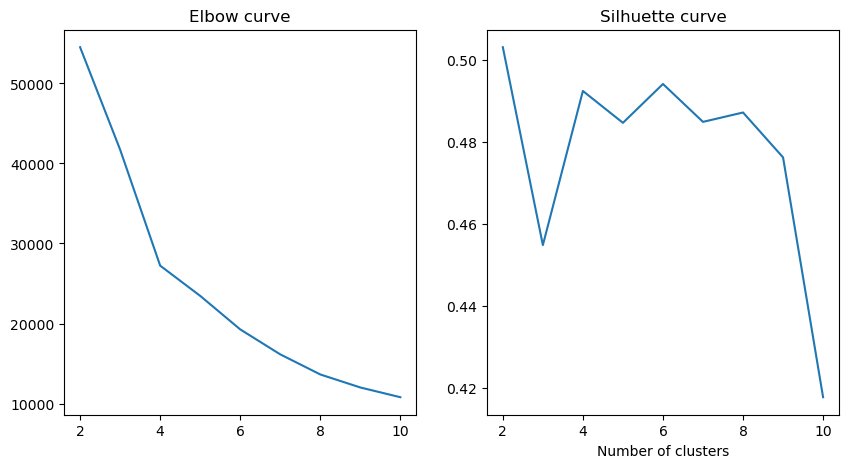

In [749]:
plot_elbow_silhouette(listings[['price_scaled', 'accommodates_scaled']])

<p><i>From the plot we decide to go with k=6 for accomodates and price. We did not perform this for the rest of the features due to the long running time for this fucntion.</i></p>

In [363]:
def KmeansAndPlot(col1, col2, nClusters):
    df = pd.concat([col1,col2], axis=1)
    k_means = KMeans(n_clusters=nClusters, random_state=1)
    k_means.fit(df)
    df['cluster'] = k_means.labels_
    # print(k_means.labels_)

    # plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x=df.columns[1], y=df.columns[0], alpha=0.5, hue='cluster', palette='tab10')
    plt.title(f"K-means clustering of {df.columns[1]} and {df.columns[0]}")

    plt.show()

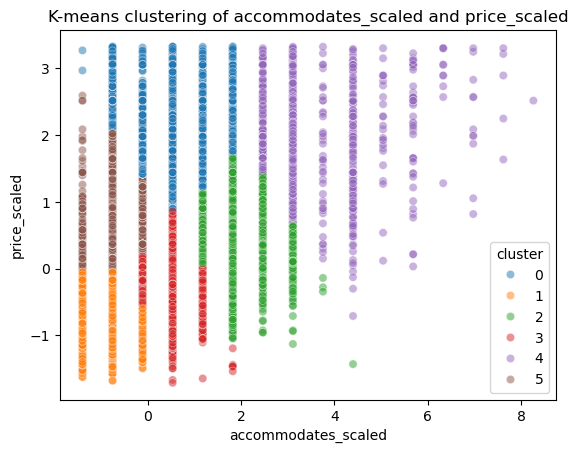

In [756]:
KmeansAndPlot(listings.price_scaled, listings.accommodates_scaled, 6)

<p><i>From the plot of the cluster, we can deduct some groups. Firstly the top right cluster (cluster 4) is the group of listings that have high price and high number of accommodates. This group contributes in creating the positive correlation between price and accommodates.

On the other side of the scale, cluster 1 forms the group of smaller and cheaper listings. 

Cluster 0 could be seen as the luxurious group as the listings found here accommodates few people but still have high prices. This cluster is to some extent explaining why the correlation between accommodates and price is not larger as there must be other features contributing to the prices for this group, such as location, amenitites or other drivers of price. 

The clusters 2 and 3 confirm the correlation between price and accommodates since group 2 has in general more accommodates and higher prices, although there are exceptions.</i></p>

<i>In addition to this, we also perform clustering on the other varialbes. Bedrooms, beds and bathrooms seem to follow some similar patterns to accommodates. This is likely due to the correlations between these variables. The k-means algorithm doesnt find any interesting patterns in the revew_scores_location as it simply slices the data points horisontally:

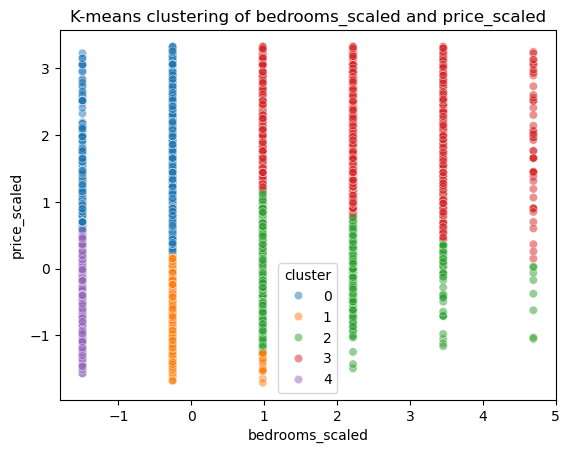

In [383]:
KmeansAndPlot(listings.price_scaled, listings.bedrooms_scaled, 5)

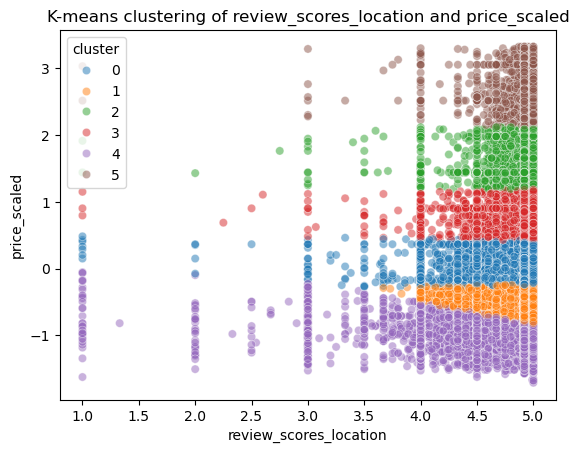

In [369]:
KmeansAndPlot(listings.price_scaled, listings.review_scores_location, 6)

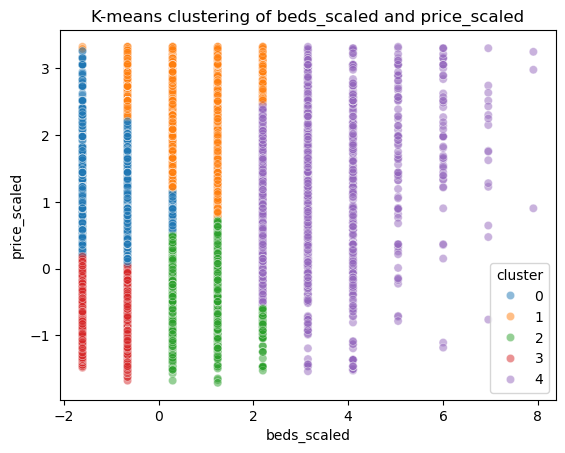

In [371]:
KmeansAndPlot(listings.price_scaled, listings.beds_scaled, 5)

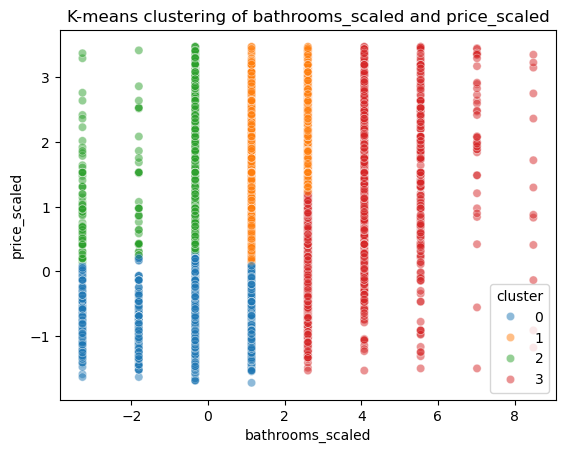

In [270]:
KmeansAndPlot(listings.price_scaled, listings.bathrooms_scaled, 4)

## <font color='red'> PCA application to identify the main drivers of Airbnb rental inflation

In [35]:
from sklearn.decomposition import PCA

<p> We will focus on the scaled features that has the highest correlation with price and use their contributions of variations to assess the main drivers of Airbnb rental inflation. Its important to note that PCA finds the features that explain the most variation in the dataset, not specifically price. If price is highly correlated with a principal component (PC), it might indicate that this PC is related to rental inflation.

In [37]:
X = listings[['price_scaled','accommodates_scaled', 'bedrooms_scaled', 'beds_scaled', 'review_scores_location_scaled', 'bathrooms_scaled']]
y = pd.cut(listings['price_scaled'], bins=3)

In [39]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

<p> We see that PC1 only contribues to 53% of the total variance in the data. Before scaling the data 100% was explained by PC1. This illustrates how important it is to scale before a PCA, so not features with large magnitudes (e.g., price, accommodates, beds) dominate the variance. Now we actually get to see meaningful structure rather than just scale differences.

In [41]:
i=1
for x in pca.explained_variance_ratio_: 
    print(f"PC{i} explains {round(x*100)}% variance in the data")
    i+=1

PC1 explains 53% variance in the data
PC2 explains 17% variance in the data


<p> The fact that PC1 explains only 53% of the variance implies that the dataset has multiple sources of variance, spread across different dimensions

<p> Now we can assess which feature that contributes most to PC1 and then PC2. The code below and the plot illustrates that accommodates, bedrooms and beds contribute most to the vairance of PC1:

In [43]:
loadings = pd.DataFrame(pca.components_.T, 
                        index=X.columns, 
                        columns=['PC1', 'PC2'])

print("Top Features in PC1 (Most Important for Variance):")
print(loadings['PC1'].abs().sort_values(ascending=False))

Top Features in PC1 (Most Important for Variance):
accommodates_scaled              0.496820
bedrooms_scaled                  0.482356
beds_scaled                      0.469596
price_scaled                     0.388119
bathrooms_scaled                 0.385764
review_scores_location_scaled    0.023069
Name: PC1, dtype: float64


<p> Furthermore we see that review_scores_location dominates the second component.</p>

In [45]:
loadings = pd.DataFrame(pca.components_.T, 
                        index=X.columns, 
                        columns=['PC1', 'PC2'])

print("Top Features in PC1 (Most Important for Variance):")
print(loadings['PC2'].abs().sort_values(ascending=False))

Top Features in PC1 (Most Important for Variance):
review_scores_location_scaled    0.957847
price_scaled                     0.246457
beds_scaled                      0.110927
accommodates_scaled              0.091297
bedrooms_scaled                  0.030801
bathrooms_scaled                 0.014116
Name: PC2, dtype: float64


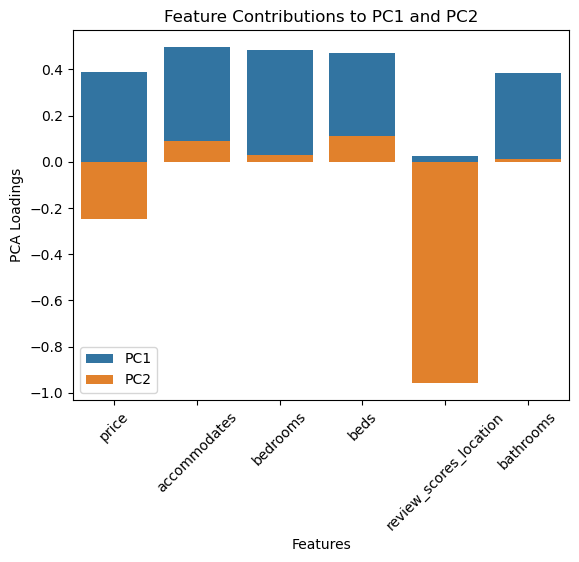

In [47]:
feature_names = ['price','accommodates', 'bedrooms', 'beds', 'review_scores_location', 'bathrooms']
sns.barplot(x=feature_names, y=pca.components_[0], label='PC1')
sns.barplot(x=feature_names, y=pca.components_[1], label='PC2')
plt.legend()
plt.xlabel("Features")
plt.ylabel("PCA Loadings")
plt.title("Feature Contributions to PC1 and PC2")
plt.xticks(rotation=45)
plt.show()

<p> Next step is to transform the data to two dimentions

In [49]:
X_pca = pca.transform(X)

<p>We use this scatterplott to illustrate how the datapoints are distiributed along the two components. By splitting price into 3 different price intervals we can assess the variation in these different levels of prices accross the two dimentions:

<Axes: >

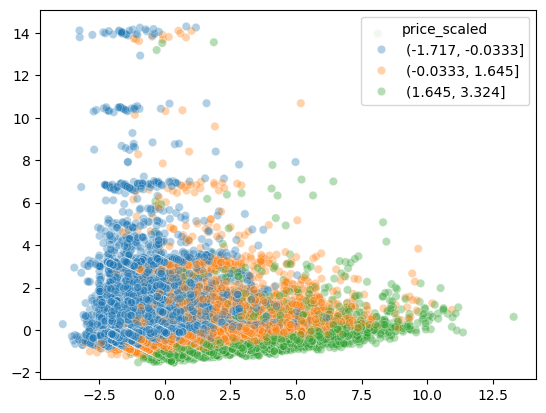

In [51]:
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1], alpha=0.35, hue=y)

<p>We see from the plot thet the highest price intervall (green) is more spred out across the X-axis and thus the PC1 indicating that PC1 is related to price variance especially for the hihgest price level. As accommodates and bedrooms are strong contributors to PC1 (and higly correlated with price), this might imply that they are important factors for higher rental prices.</p>

## <font color='red'> Question:
## <font color='red'>The dataset has multiple features. Suppose that you decided to retain the top ‘n’ principal components that explain at least 95% of the variance. How can we determine the optimal ‘n’ without computing PCA for all features?

In [654]:
print(f"With only two components in our PCA, we only manage to retain {round(pca.explained_variance_ratio_.sum()*100,2)}% of the explained variance and thus loose {round(100-pca.explained_variance_ratio_.sum()*100,2)} % by the decomposition.")

With only two components in our PCA, we only manage to retain 69.95% of the explained variance and thus loose 30.05 % by the decomposition.


<p> In order to find the n number of compontents that retains at leas 95% of the variance, we instanciate PCA() without any number of components as argument. What this does is that the PCA keeps all the number for components/dimentions up to the total number of dimensions in the dataset (6) in our case. In other words, we dont have to compute the PCA for all the different components:

In [678]:
pca_test = PCA()
pca_test.fit(X)

PCA()

<p> Now the .explaned_variance_ attribute will provide the explained variance in all the 6 different cases. We need to take the cumulative sum, because the last component adds ints explained variance to the other components:

In [689]:
pca_test.explained_variance_ratio_

array([0.52713431, 0.17239233, 0.10649362, 0.09981217, 0.05729655,
       0.03687102])

In [692]:
cumulative_variance = np.cumsum(pca_test.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of principal components (n) to retain 95% variance: {n_components}")

Optimal number of principal components (n) to retain 95% variance: 5


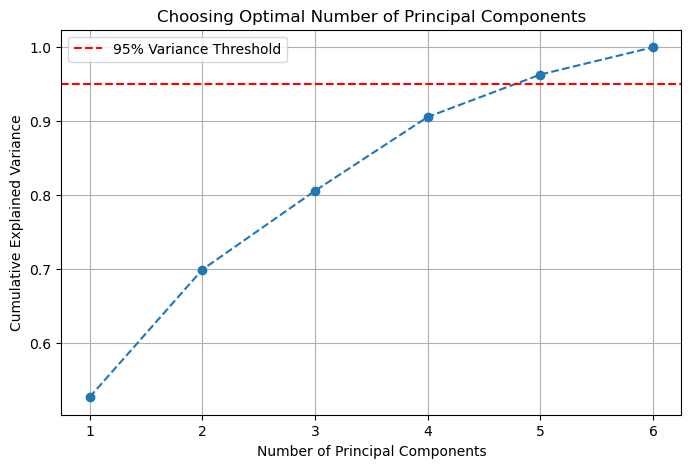

In [730]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing Optimal Number of Principal Components')
plt.legend()
plt.grid()
plt.show()

## <font color='red'> Question:
## <font color='red'> Now, you have performed PCA on the dataset with ‘n’ features. Here, you want to add a new feature that is a linear combination of existing features. Do you think it is a good idea? How will this impact the principal components and explained variance?

<p> That is not a good idea. A feature that is a linear combination of exisitng feature, will not contribute with any new variation in the data. However, it will contribute with one more dimenison. In order to maintan the data at the same n of dimension one would have to do another decompensation. This would not change the total variance in the dataset, since the new feature is just a linear combination of existing ones, but it may disort the principal components by causing PCA to redistribute variance across components.

## <font color='red'> Finally, now compare the knowledge obtained from the cluster and PCA analyses.


Cluster and PCA are two different tecniques which provide different information about the data, both of them though are highly important.
Cluster is used for distinguish/seperate the data in groups which share similar characteristics while PCA reduces dimensions keeping the most important features that explain the variance that helps identify hidden patterns.

PCA shows that accommodates, bedrooms, and beds contribute the most to variance and that on PC1 high price contributes to variance in PC1. 
Clustering doesn’t explain variance but instead finds natural groupings in the data. 
Taking both of them into consideration, from the cluster graph with price/accommodates, higher price points seem to belong to specific clusters - 0 (blue) & 4 (purple). 
High-Price Listings are More Scattered as we see in PCA as price is spread across PC1, and in clustering, we see that higher price listings don’t fall into a single cluster and this suggests that airbnbs vary in other key factors.